# Import needed package

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [374]:
livestock_data = pd.read_csv('32100130.csv')

In [376]:
livestock_data.head()

,REF_DATE,GEO,DGUID,Livestock,Survey date,Farm type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1931,Canada,2016A000011124,Total cattle,At July 1,On all cattle operations,Head,148,thousands,3,v61382,1.1.1.1,7973.2,NaN,NaN,NaN,1
1,1931,Canada,2016A000011124,"Bulls, 1 year and over",At July 1,On all cattle operations,Head,148,thousands,3,v61383,1.2.1.1,237.6,NaN,NaN,NaN,1
2,1931,Canada,2016A000011124,Dairy cows,At July 1,On all cattle operations,Head,148,thousands,3,v61384,1.3.1.1,3391.9,NaN,NaN,NaN,1
3,1931,Canada,2016A000011124,Beef cows,At July 1,On all cattle operations,Head,148,thousands,3,v61385,1.4.1.1,551.2,NaN,NaN,NaN,1
4,1931,Canada,2016A000011124,Total heifers,At July 1,On all cattle operations,Head,148,thousands,3,v41123206,1.5.1.1,1057.8,NaN,NaN,NaN,1


In [378]:
livestock_data.drop(['STATUS', 'SYMBOL', 'TERMINATED'], axis=1, inplace=True)

In [380]:
livestock_data.head()

,REF_DATE,GEO,DGUID,Livestock,Survey date,Farm type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
0,1931,Canada,2016A000011124,Total cattle,At July 1,On all cattle operations,Head,148,thousands,3,v61382,1.1.1.1,7973.2,1
1,1931,Canada,2016A000011124,"Bulls, 1 year and over",At July 1,On all cattle operations,Head,148,thousands,3,v61383,1.2.1.1,237.6,1
2,1931,Canada,2016A000011124,Dairy cows,At July 1,On all cattle operations,Head,148,thousands,3,v61384,1.3.1.1,3391.9,1
3,1931,Canada,2016A000011124,Beef cows,At July 1,On all cattle operations,Head,148,thousands,3,v61385,1.4.1.1,551.2,1
4,1931,Canada,2016A000011124,Total heifers,At July 1,On all cattle operations,Head,148,thousands,3,v41123206,1.5.1.1,1057.8,1


In [382]:
livestock_data.isnull().sum()

REF_DATE            0
GEO                 0
DGUID            6842
Livestock           0
Survey date         0
Farm type           0
UOM                 0
UOM_ID              0
SCALAR_FACTOR       0
SCALAR_ID           0
VECTOR              0
COORDINATE          0
VALUE             103
DECIMALS            0
dtype: int64

In [384]:
livestock_data['VALUE'] = livestock_data['VALUE'].fillna(0)  # Replace NaN in column 'VALUE' only

In [386]:
livestock_data.isnull().sum()

REF_DATE            0
GEO                 0
DGUID            6842
Livestock           0
Survey date         0
Farm type           0
UOM                 0
UOM_ID              0
SCALAR_FACTOR       0
SCALAR_ID           0
VECTOR              0
COORDINATE          0
VALUE               0
DECIMALS            0
dtype: int64

In [388]:
livestock_data.dtypes

REF_DATE           int64
GEO               object
DGUID             object
Livestock         object
Survey date       object
Farm type         object
UOM               object
UOM_ID             int64
SCALAR_FACTOR     object
SCALAR_ID          int64
VECTOR            object
COORDINATE        object
VALUE            float64
DECIMALS           int64
dtype: object

In [390]:
livestock_data.describe()

,REF_DATE,UOM_ID,SCALAR_ID,VALUE,DECIMALS
count,48738.000000,48738.0,48738.0,48738.000000,48738.0
mean,2000.169334,148.0,3.0,399.327490,1.0
std,22.399713,0.0,0.0,1173.654033,0.0
min,1931.000000,148.0,3.0,0.000000,1.0
25%,1994.000000,148.0,3.0,6.400000,1.0
50%,2007.000000,148.0,3.0,47.000000,1.0
75%,2016.000000,148.0,3.0,285.500000,1.0
max,2024.000000,148.0,3.0,16880.000000,1.0


In [392]:
livestock_data.describe(include='object')

,GEO,DGUID,Livestock,Survey date,Farm type,UOM,SCALAR_FACTOR,VECTOR,COORDINATE
count,48738,41896,48738,48738,48738,48738,48738,48738,48738
unique,14,12,11,2,6,1,1,1408,1408
top,Canada,2016A000011124,Total heifers,At July 1,On all cattle operations,Head,thousands,v61382,1.1.1.1
freq,4575,4575,4900,24809,21238,48738,48738,94,94


In [394]:
livestock_data.value_counts('Livestock')

Livestock
Total heifers                    4900
Beef cows                        4537
Bulls, 1 year and over           4537
Calves, under 1 year             4537
Dairy cows                       4537
Heifers for dairy replacement    4537
Steers, 1 year and over          4537
Total beef heifers               4537
Total cattle                     4537
Heifers for beef replacement     3771
Heifers for slaughter            3771
Name: count, dtype: int64

In [396]:
livestock_data.value_counts('REF_DATE')

REF_DATE
2024    1408
2012    1408
2000    1408
2001    1408
2003    1408
        ... 
1932      93
1937      93
1938      93
1939      93
1931      93
Name: count, Length: 94, dtype: int64

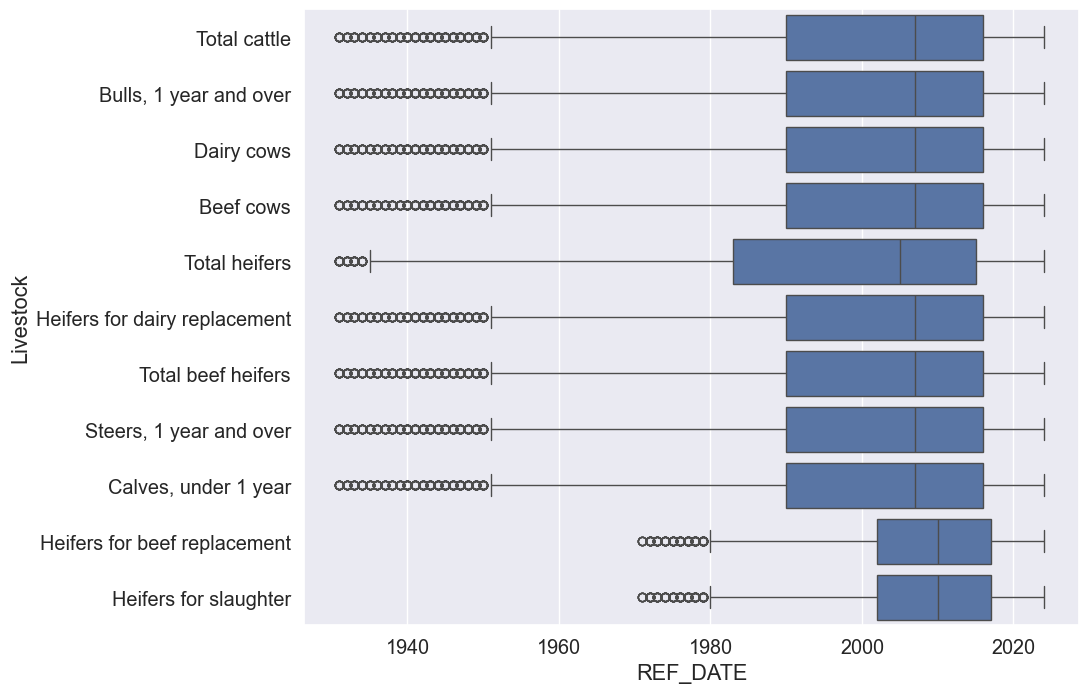

In [398]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
sns.boxplot(data=livestock_data, x='REF_DATE', y='Livestock')
plt.show()

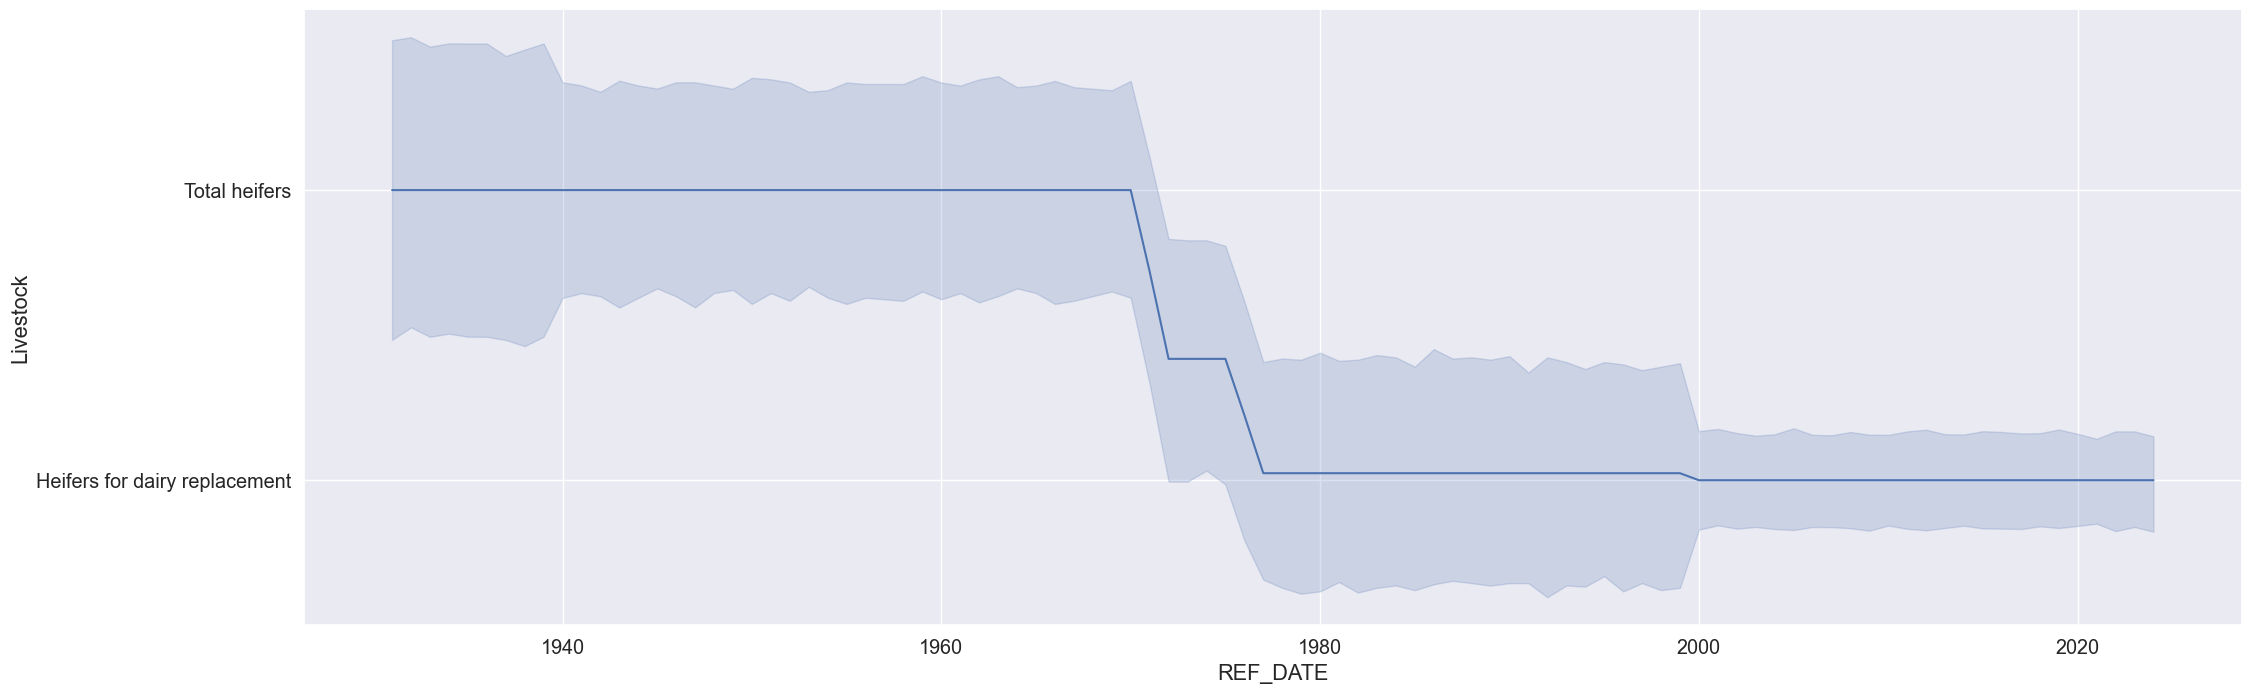

In [400]:
plt.figure(figsize=(25,8))
sns.set(font_scale=1.3)
sns.lineplot(data=livestock_data, x='REF_DATE', y='Livestock')
plt.show()

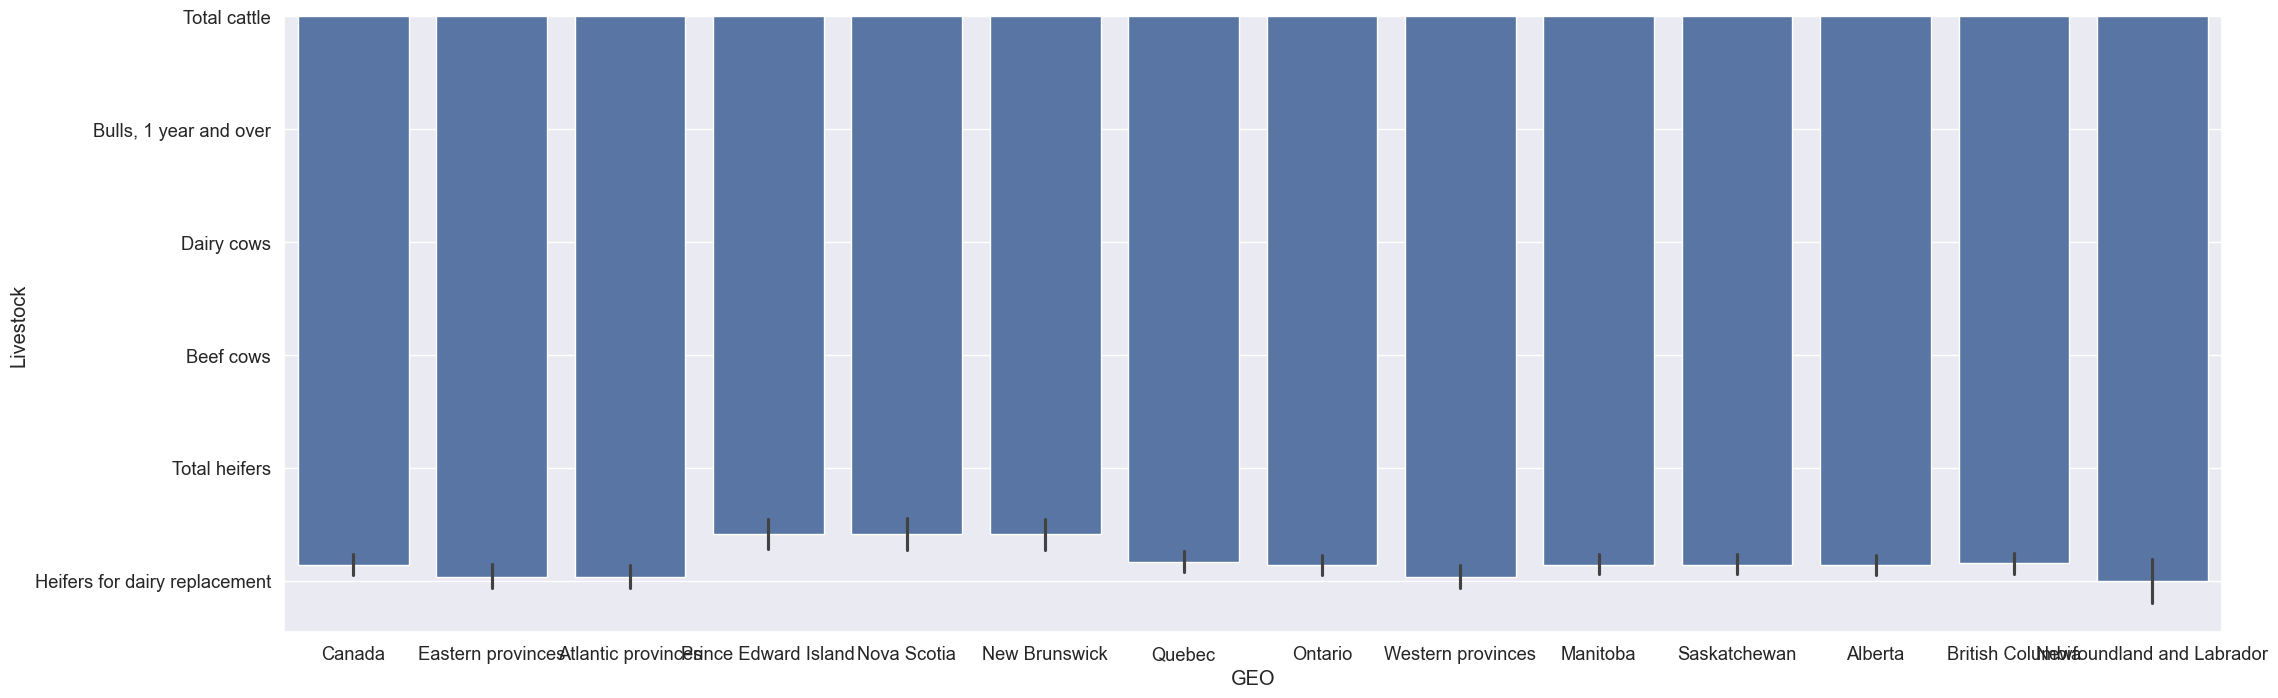

In [402]:
plt.figure(figsize=(25,8))
sns.set(font_scale=1.2)
sns.barplot(data=livestock_data, x='GEO', y='Livestock')
plt.show()

In [404]:
livestock_data.select_dtypes('float').corr()

,VALUE
VALUE,1.0


In [406]:
livestock_data.head()

,REF_DATE,GEO,DGUID,Livestock,Survey date,Farm type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
0,1931,Canada,2016A000011124,Total cattle,At July 1,On all cattle operations,Head,148,thousands,3,v61382,1.1.1.1,7973.2,1
1,1931,Canada,2016A000011124,"Bulls, 1 year and over",At July 1,On all cattle operations,Head,148,thousands,3,v61383,1.2.1.1,237.6,1
2,1931,Canada,2016A000011124,Dairy cows,At July 1,On all cattle operations,Head,148,thousands,3,v61384,1.3.1.1,3391.9,1
3,1931,Canada,2016A000011124,Beef cows,At July 1,On all cattle operations,Head,148,thousands,3,v61385,1.4.1.1,551.2,1
4,1931,Canada,2016A000011124,Total heifers,At July 1,On all cattle operations,Head,148,thousands,3,v41123206,1.5.1.1,1057.8,1


# Feature Encoding

In [408]:
livestock_data["Livestock"].unique()

array(['Total cattle', 'Bulls, 1 year and over', 'Dairy cows',
       'Beef cows', 'Total heifers', 'Heifers for dairy replacement',
       'Total beef heifers', 'Steers, 1 year and over',
       'Calves, under 1 year', 'Heifers for beef replacement',
       'Heifers for slaughter'], dtype=object)

In [410]:
livestock_data["Survey date"].unique()

array(['At July 1', 'At January 1'], dtype=object)

In [412]:
livestock_data.head()

,REF_DATE,GEO,DGUID,Livestock,Survey date,Farm type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
0,1931,Canada,2016A000011124,Total cattle,At July 1,On all cattle operations,Head,148,thousands,3,v61382,1.1.1.1,7973.2,1
1,1931,Canada,2016A000011124,"Bulls, 1 year and over",At July 1,On all cattle operations,Head,148,thousands,3,v61383,1.2.1.1,237.6,1
2,1931,Canada,2016A000011124,Dairy cows,At July 1,On all cattle operations,Head,148,thousands,3,v61384,1.3.1.1,3391.9,1
3,1931,Canada,2016A000011124,Beef cows,At July 1,On all cattle operations,Head,148,thousands,3,v61385,1.4.1.1,551.2,1
4,1931,Canada,2016A000011124,Total heifers,At July 1,On all cattle operations,Head,148,thousands,3,v41123206,1.5.1.1,1057.8,1


In [414]:
from sklearn import preprocessing

label_encode = ['Survey date']
                
mapping_trip_type = {
    'At July 1'  : 0,
    'At January 1'     : 1,
}               


livestock_data['Survey date'] = preprocessing.LabelEncoder() \
                                    .fit_transform(livestock_data['Survey date'])

In [416]:
livestock_data.head()

,REF_DATE,GEO,DGUID,Livestock,Survey date,Farm type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS
0,1931,Canada,2016A000011124,Total cattle,1,On all cattle operations,Head,148,thousands,3,v61382,1.1.1.1,7973.2,1
1,1931,Canada,2016A000011124,"Bulls, 1 year and over",1,On all cattle operations,Head,148,thousands,3,v61383,1.2.1.1,237.6,1
2,1931,Canada,2016A000011124,Dairy cows,1,On all cattle operations,Head,148,thousands,3,v61384,1.3.1.1,3391.9,1
3,1931,Canada,2016A000011124,Beef cows,1,On all cattle operations,Head,148,thousands,3,v61385,1.4.1.1,551.2,1
4,1931,Canada,2016A000011124,Total heifers,1,On all cattle operations,Head,148,thousands,3,v41123206,1.5.1.1,1057.8,1


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro av

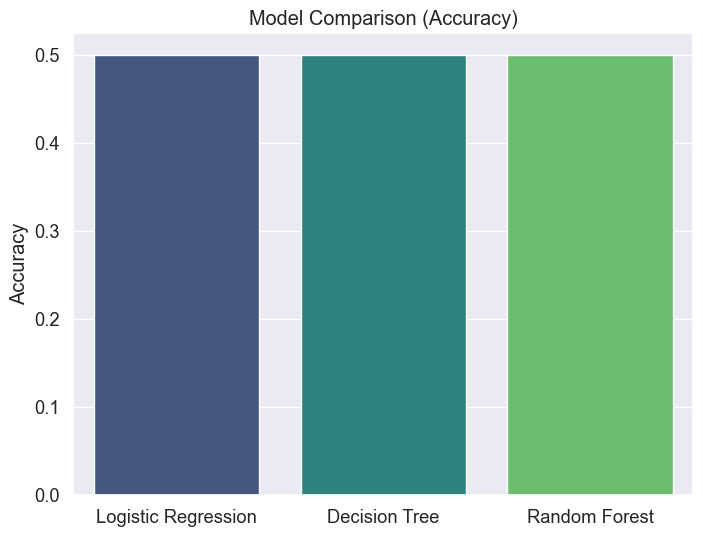

In [431]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame
data = {
    'Livestock': [
        'Total cattle', 'Dairy cows', 'Bulls, 1 year and over', 'Beef cows',
        'Unknown type', 'Heifers for slaughter', 'Total heifers', 'Calves, under 1 year',
        '  Dairy cows ', '  Bulls, 1 year and over '
    ],
    'SurveyData': [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Clean the "Livestock" column (strip spaces)
df['Livestock'] = df['Livestock'].str.strip()

# Encode the "Livestock" column using LabelEncoder
encoder = LabelEncoder()
df['Livestock_encoded'] = encoder.fit_transform(df['Livestock'])

# Define features (X) and target (y)
X = df[['Livestock_encoded']]  # Features
y = df['SurveyData']  # Target

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logreg = LogisticRegression()
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train the models
logreg.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Print classification reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC AUC Score (good for binary classification)
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"ROC AUC for Logistic Regression: {roc_auc_logreg:.2f}")
print(f"ROC AUC for Decision Tree: {roc_auc_dt:.2f}")
print(f"ROC AUC for Random Forest: {roc_auc_rf:.2f}")

# Compare Models using Accuracy
accuracy_results = [acc_logreg, acc_dt, acc_rf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Plot the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracy_results, palette='viridis')
plt.title('Model Comparison (Accuracy)')
plt.ylabel('Accuracy')
plt.show()